In [2]:
#Objective: Predict future sales trends and optimize inventory management.
#Data: Historical sales data,
#Model: ARIMA

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [36]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [58]:
csv_data = pd.read_csv('C:/Users/Clyf/Downloads/forecast_data.csv')

In [39]:
forecast_results = {}

In [42]:
grouped_data = csv_data.groupby(['store', 'item'])

In [44]:
#Adding 5 timesplits for cross-validation)

tscv = TimeSeriesSplit(n_splits=5)

In [46]:
for (store, item), group in grouped_data:
    #There's an option to print using: print(f"Processing Store {store}, Item {item} ...")
    
    #Ensuring the group is sorted by date
    group['date'] = pd.to_datetime(group['date'])
    group.set_index('date', inplace=True)
    
    #Setting date frequency to 'daily'
    group = group.asfreq('D')

    #Checking stationarity with ADF test

    result = adfuller(group['sales'].dropna())
    adf_statistic = result[0]
    adf_p_value = result[1]

In [47]:
#Performing differencing

if adf_p_value > 0.05:
        group['sales_diff'] = group['sales'].diff().dropna()
else:
        group['sales_diff'] = group['sales']

In [48]:
#List to store Mean Absolute Error (MAE)

mae_scores = []

In [49]:
#Performing Cross-Validation

for train_index, test_index in tscv.split(group['sales_diff'].dropna()):
     train, test = group['sales_diff'].iloc[train_index], group['sales_diff'].iloc[test_index]

In [50]:
#Fitting ARIMA model

model = ARIMA(group['sales_diff'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
 forecast = model_fit.forecast(steps=len(test))

In [22]:
#Calculate Mean Absolute Error (MAE) on the test set

mae = mean_absolute_error(test, forecast)
mae_scores.append(mae)

In [24]:
#Calculating the average MAE across all cross-validation splits

avg_mae = np.mean(mae_scores)
print(f"Average MAE for Store {store}, Item {item}: {avg_mae}")

Average MAE for Store 10, Item 50: 23.46458377138891


In [25]:
#Forecasting for the next 30 days

forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

In [27]:
(adf_statistic, adf_p_value, forecast)

(-3.0228613863504368,
 0.032813890989587584,
 2018-01-01    67.555111
 2018-01-02    65.959448
 2018-01-03    65.783182
 2018-01-04    65.763710
 2018-01-05    65.761559
 2018-01-06    65.761322
 2018-01-07    65.761296
 2018-01-08    65.761293
 2018-01-09    65.761292
 2018-01-10    65.761292
 2018-01-11    65.761292
 2018-01-12    65.761292
 2018-01-13    65.761292
 2018-01-14    65.761292
 2018-01-15    65.761292
 2018-01-16    65.761292
 2018-01-17    65.761292
 2018-01-18    65.761292
 2018-01-19    65.761292
 2018-01-20    65.761292
 2018-01-21    65.761292
 2018-01-22    65.761292
 2018-01-23    65.761292
 2018-01-24    65.761292
 2018-01-25    65.761292
 2018-01-26    65.761292
 2018-01-27    65.761292
 2018-01-28    65.761292
 2018-01-29    65.761292
 2018-01-30    65.761292
 Freq: D, Name: predicted_mean, dtype: float64)

In [28]:
forecast_results[(store, item)] = forecast

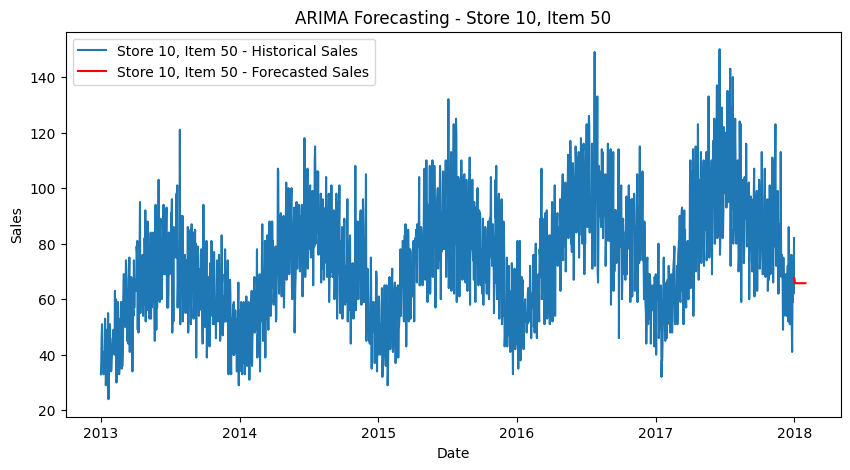

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(group['sales'], label=f'Store {store}, Item {item} - Historical Sales')
plt.plot(forecast.index, forecast, label=f'Store {store}, Item {item} - Forecasted Sales', color='red')
plt.legend()
plt.title(f'ARIMA Forecasting - Store {store}, Item {item}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show() #<-- Loops through all store-item groups and overwrites them to display the last one Sore 10, Item 50

In [ ]:
for (store, item), group in grouped_data:
    plt.figure(figsize=(4, 2))
    plt.plot(group['sales'], label=f'Store {store}, Item {item} - Historical Sales')
    plt.plot(forecast.index, forecast, label=f'Store {store}, Item {item} - Forecasted Sales', color='red')
    plt.legend()
    plt.title(f'ARIMA Forecasting - Store {store}, Item {item}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    #plt.show() #<--- to display each for each store-item separately

In [ ]:
for (store, item), group in grouped_data:
    plt.figure(figsize=(10, 5))
    plt.plot(group['sales'], label=f'Store {store}, Item {item} - Historical Sales')
    plt.plot(forecast.index, forecast, label=f'Store {store}, Item {item} - Forecasted Sales', color='red')
    plt.legend()
    plt.title(f'ARIMA Forecasting - Store {store}, Item {item}')
    plt.xlabel('Date')
    plt.ylabel('Sales')

In [ ]:
    plt.savefig(f'store_{store}_item_{item}_forecast.png')
    plt.close #<--- saves and closes all figures as files instead of displaying them.